In [370]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [371]:
import warnings
warnings.filterwarnings('ignore')

In [372]:
train = pd.read_csv('../Data/PJT002_train.csv')

train.sample()

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
58949,78605,2018-02-02 17:37:42,단독주택,철근콘크리트구조,1,205.36,604.37,317.0,2.01004e+07,4.0,...,N,74,2,1,83,583,21882,54,10,N


In [373]:
pd.DataFrame(train.columns)

,0
0,id
1,dt_of_fr
2,bldng_us
3,bldng_archtctr
4,bldng_cnt
5,bldng_ar
6,ttl_ar
7,lnd_ar
8,dt_of_athrztn
9,ttl_grnd_flr


In [374]:
train.shape

(59199, 172)

## Null 값 확인

In [375]:
train.isnull().sum()

id                          0
dt_of_fr                    0
bldng_us                27677
bldng_archtctr          27665
bldng_cnt                   0
bldng_ar                    0
ttl_ar                      0
lnd_ar                      0
dt_of_athrztn           27581
ttl_grnd_flr            10210
ttl_dwn_flr             11005
bldng_us_clssfctn       29343
tmprtr                     13
prcpttn                 53629
wnd_spd                    33
wnd_drctn                 221
hmdt                       22
gas_engry_us_201401     53825
ele_engry_us_201401     43550
gas_engry_us_201402     53825
ele_engry_us_201402     43550
gas_engry_us_201403     53825
ele_engry_us_201403     43550
gas_engry_us_201404     53825
ele_engry_us_201404     43550
gas_engry_us_201405     53825
ele_engry_us_201405     43550
gas_engry_us_201406     53825
ele_engry_us_201406     43550
gas_engry_us_201407     53825
                        ...  
lw_13101410             58916
lw_13111010             58899
lw_1311111

In [376]:
# 전기 가스 제외 나머지 칼럼
columns = ['id', 'dt_of_fr', 'bldng_us', 'bldng_archtctr', 'bldng_cnt'
           , 'bldng_ar', 'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr'
           , 'ttl_dwn_flr', 'bldng_us_clssfctn', 'tmprtr', 'prcpttn'
           , 'wnd_spd', 'wnd_drctn', 'hmdt', 'jmk'
           , 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc'
           , 'mlt_us_yn', 'cctv_dstnc', 'cctv_in_100m'
           , 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc'
           , 'ahsm_dstnc', 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m', 'fr_yn'
          ]

train[columns].isnull().sum()

id                          0
dt_of_fr                    0
bldng_us                27677
bldng_archtctr          27665
bldng_cnt                   0
bldng_ar                    0
ttl_ar                      0
lnd_ar                      0
dt_of_athrztn           27581
ttl_grnd_flr            10210
ttl_dwn_flr             11005
bldng_us_clssfctn       29343
tmprtr                     13
prcpttn                 53629
wnd_spd                    33
wnd_drctn                 221
hmdt                       22
jmk                         0
fr_sttn_dstnc               0
fr_wthr_fclt_dstnc          0
mlt_us_yn                   0
cctv_dstnc                  0
cctv_in_100m                0
fr_wthr_fclt_in_100m        0
tbc_rtl_str_dstnc           0
sft_emrgnc_bll_dstnc        0
ahsm_dstnc                  0
no_tbc_zn_dstnc             0
bldng_cnt_in_50m            0
fr_yn                       0
dtype: int64

In [377]:
# NULL 값 없는 칼럼 전체

columns = ['id', 'dt_of_fr', 'bldng_cnt', 'bldng_ar', 'ttl_ar', 'lnd_ar'
           , 'jmk', 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc'
           , 'mlt_us_yn', 'cctv_dstnc', 'cctv_in_100m'
           , 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc'
           , 'ahsm_dstnc', 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m', 'fr_yn'
          ]

df = train[columns]

In [378]:
df.sample()

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
6082,79181,2016-05-02 21:37:29,2,77.4,77.4,588.0,대,3685,173,N,221,0,0,82,23416,38781,36,3,N


# PreProcessing

## fr_yn One Hot Encoding
- Y: 1
- N: 0

In [379]:
df['fr_yn'].unique()

array(['N', 'Y'], dtype=object)

In [380]:
df['fire_yes'] = (df['fr_yn'] == 'Y')

df[['fr_yn', 'fire_yes']].sample()

,fr_yn,fire_yes
49251,N,False


# datetime Parsing 
dt_of_fr 관찰시점

In [382]:
df['year'] = pd.to_datetime(df['dt_of_fr']).dt.year
df['month'] = pd.to_datetime(df['dt_of_fr']).dt.month
df['day'] = pd.to_datetime(df['dt_of_fr']).dt.day
df['hour'] = pd.to_datetime(df['dt_of_fr']).dt.hour
df['minute'] = pd.to_datetime(df['dt_of_fr']).dt.minute
df['second'] = pd.to_datetime(df['dt_of_fr']).dt.second
df['dayofweek'] = pd.to_datetime(df['dt_of_fr']).dt.day_name()

df['year-month'] = df['dt_of_fr'].apply(lambda x: x[:7])

df[['dt_of_fr', 'year-month', 'year', 'month', 'day', 'dayofweek', 'hour', 'minute', 'second']].sample()

,dt_of_fr,year-month,year,month,day,dayofweek,hour,minute,second
54524,2017-09-21 13:15:37,2017-09,2017,9,21,Thursday,13,15,37


## df['fire_yes'] == True 불이 난 날

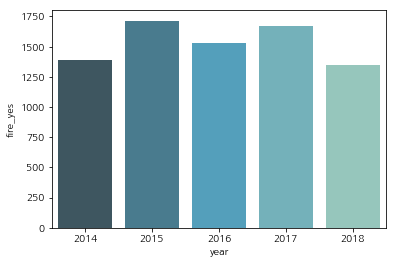

In [567]:
# 연도별 트렌드 확인
data = pd.DataFrame(df.groupby('year')['fire_yes'].sum()).reset_index()

sns.barplot(x='year', y='fire_yes', data=data, palette='GnBu_d')

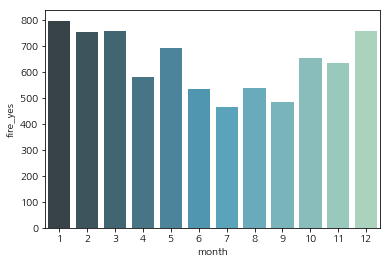

In [384]:
# 월별 트렌드 확인
data = pd.DataFrame(df.groupby('month')['fire_yes'].sum()).reset_index()

sns.barplot(x='month', y='fire_yes', data=data, palette='GnBu_d')

계절성 확인
- 여름에 줄고, 겨울에 늘어난다

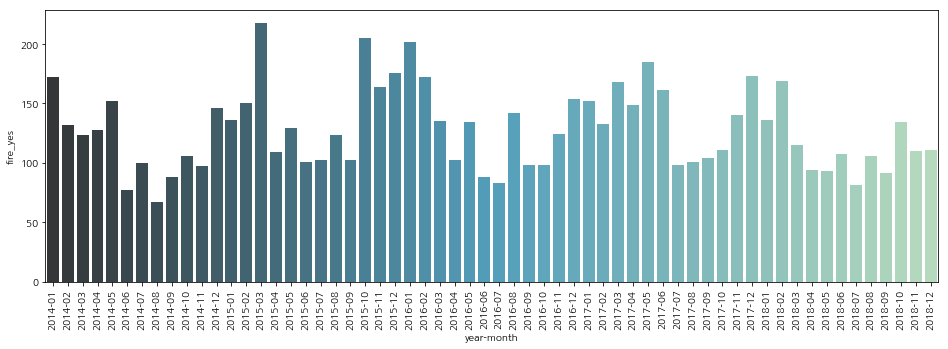

In [385]:
data = pd.DataFrame(df.groupby('year-month')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 5])
sns.barplot(x='year-month', y='fire_yes', data=data, palette='GnBu_d')
plt.xticks(rotation=90)
plt.show()

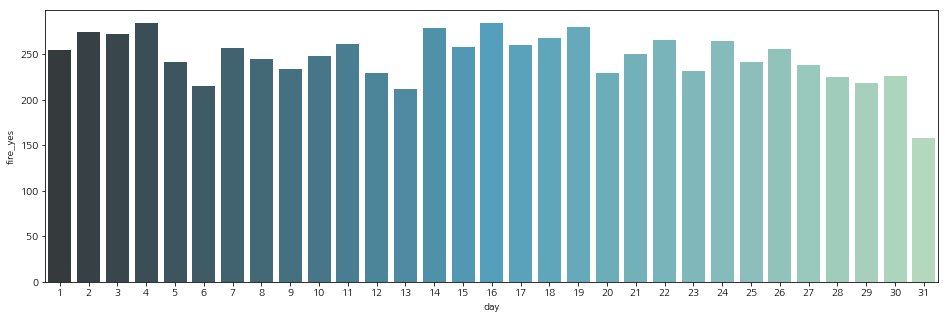

In [581]:
data = pd.DataFrame(df.groupby('day')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 5])
sns.barplot(x='day', y='fire_yes', data=data, palette='GnBu_d')
plt.show()

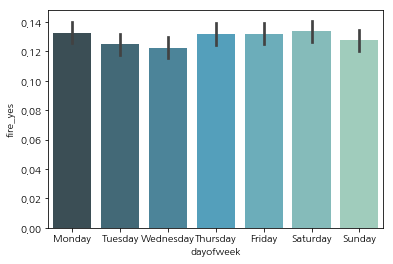

In [388]:
# 요일별 트렌드 확인
data = pd.DataFrame(df.groupby('dayofweek')['fire_yes'].sum()).reset_index()
index_weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(x='dayofweek', y='fire_yes', data=df, order=index_weekday, palette='GnBu_d')

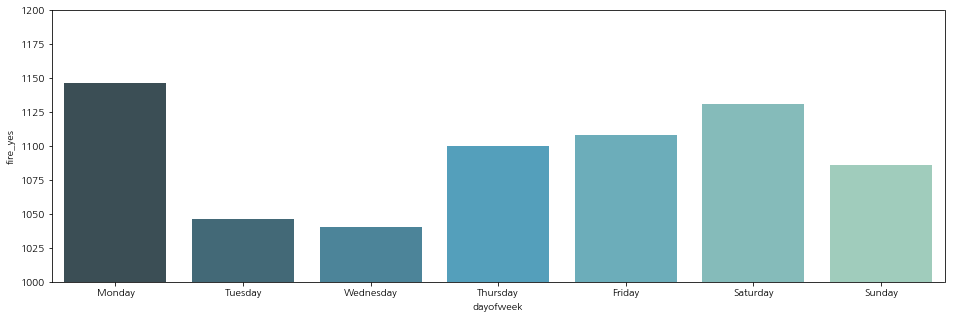

In [387]:
# 요일별 트렌드 확대
plt.figure(figsize=[16, 5])
axes=sns.barplot(x='dayofweek', y='fire_yes', data=data, order=index_weekday, palette='GnBu_d')
axes.set(ylim=(1000, 1200))
plt.show()

# *****요일 - 장소 상관성 확인

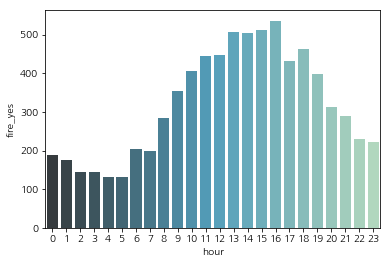

In [389]:
# 시간대별 트렌드
data = pd.DataFrame(df.groupby('hour')['fire_yes'].sum()).reset_index()

sns.barplot(x='hour', y='fire_yes', data=data, palette='GnBu_d')
plt.show()

심야시간 대비 사람들이 활동할 시간에 화재발생 많다

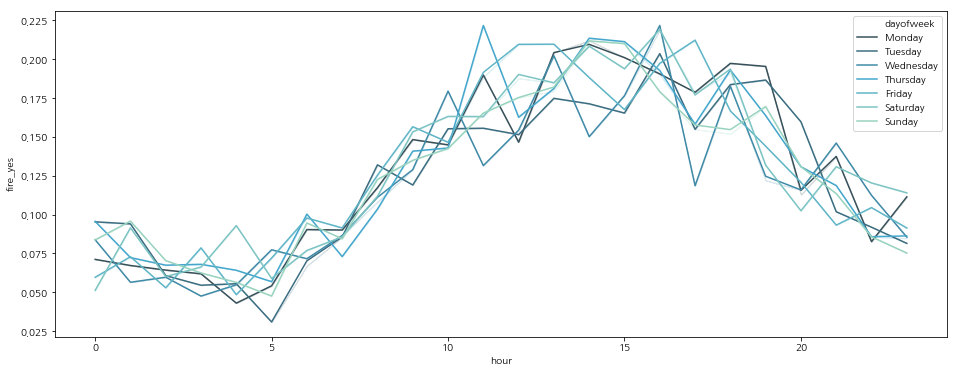

In [580]:
## 요일 시간대 상관성- 딱히 없어보임
plt.figure(figsize=[16, 6])
sns.lineplot(x='hour', y='fire_yes', hue='dayofweek', hue_order=index_weekday, data=df, palette='GnBu_d', ci=False)

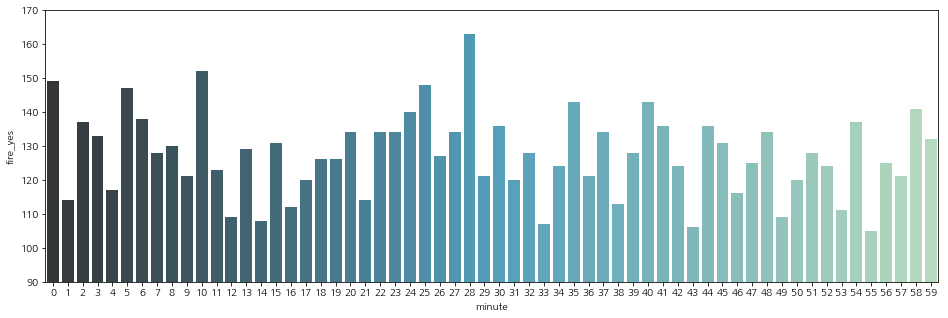

In [390]:
data = pd.DataFrame(df.groupby('minute')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 5])
axes = sns.barplot(x='minute', y='fire_yes', data=data, palette='GnBu_d')
axes.set(ylim=(90, 170))
plt.show()

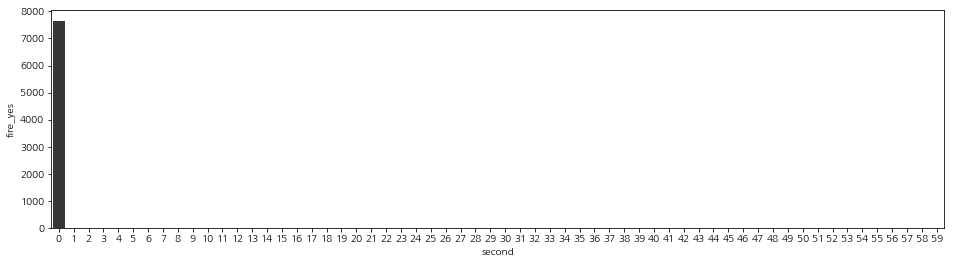

In [391]:
data = pd.DataFrame(df.groupby('second')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 4])
sns.barplot(x='second', y='fire_yes', data=data, palette='GnBu_d')
plt.show()

화재발생 초는 00초로 통일한것으로 보임-의미없음

## df['fire_yes'] == False 불이 안난 날

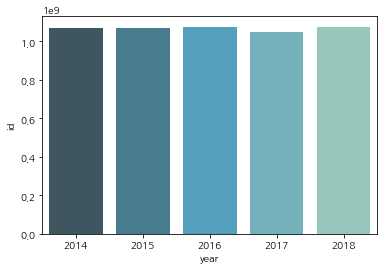

In [392]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('year')['id'].sum()).reset_index()

sns.barplot(x='year', y='id', data=data, palette='GnBu_d')

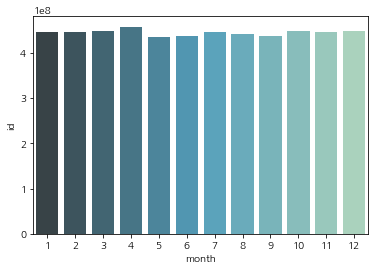

In [393]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('month')['id'].sum()).reset_index()

sns.barplot(x='month', y='id', data=data, palette='GnBu_d')

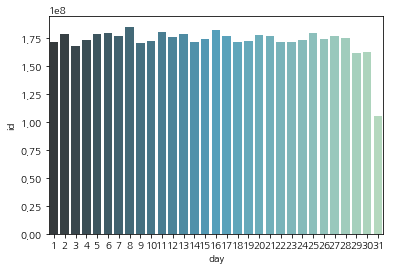

In [394]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('day')['id'].sum()).reset_index()

sns.barplot(x='day', y='id', data=data, palette='GnBu_d')

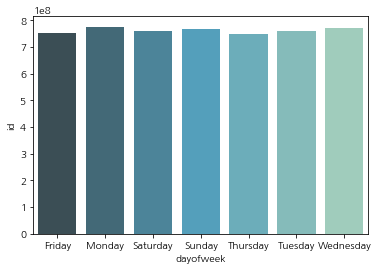

In [395]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('dayofweek')['id'].sum()).reset_index()

sns.barplot(x='dayofweek', y='id', data=data, palette='GnBu_d')

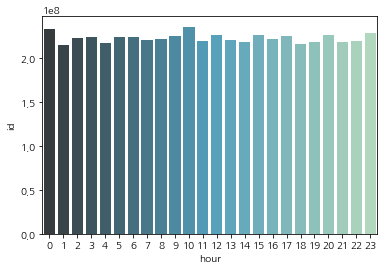

In [396]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('hour')['id'].sum()).reset_index()

sns.barplot(x='hour', y='id', data=data, palette='GnBu_d')

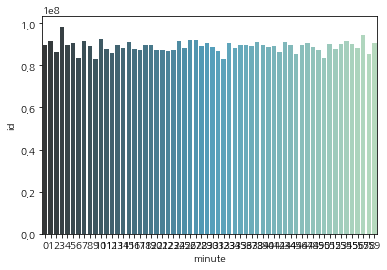

In [397]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('minute')['id'].sum()).reset_index()

sns.barplot(x='minute', y='id', data=data, palette='GnBu_d')

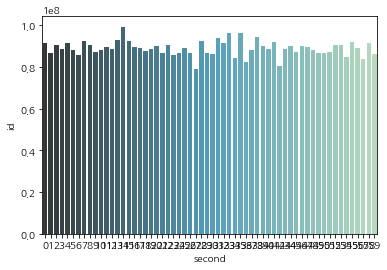

In [398]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('second')['id'].sum()).reset_index()

sns.barplot(x='second', y='id', data=data, palette='GnBu_d')

# correlation

In [399]:
df.corr()
# second -0.5 :화재발생은 0초에만 있어서
# fr_wthr_fclt_dstnc -0.16: 소방용수시설과 가까울수록 화재발생
# - 불이 자주 나는 곳에 소방용수시설을 설치했기 때문 
# ahsm_dstnc 0.11: 자동심장제세동기와의 거리
# - 시설이 있는 곳이 도시
# fr_wthr_fclt_in_100m 0.09
# bldng_ar 0.08

# hour 0.07
# fr_sttn_dstnc -0.07
# tbc_rtl_str_dstnc -0.06
# bldng_cnt 0.05
# ttl_ar 0.05

,id,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,fr_sttn_dstnc,fr_wthr_fclt_dstnc,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,...,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fire_yes,year,month,day,hour,minute,second
id,1.000000,-0.001038,0.005470,-0.000870,0.000515,-0.000474,0.008163,-0.001483,0.001142,-0.007934,...,0.001546,0.004541,0.001812,-0.002368,-0.002544,-0.001609,-0.000267,-0.000414,-0.012124,-0.000104
bldng_cnt,-0.001038,1.000000,0.530414,0.189012,0.443320,0.009314,-0.014234,0.010925,-0.066528,-0.051694,...,-0.003087,0.029456,-0.048917,0.056176,0.002270,0.000446,-0.004154,0.008258,-0.000111,-0.025870
bldng_ar,0.005470,0.530414,1.000000,0.329309,0.604804,-0.029663,-0.005821,-0.011676,-0.014838,-0.008633,...,0.034578,-0.014944,-0.009598,0.085169,0.001947,0.003814,-0.000062,0.011439,-0.003473,-0.042919
ttl_ar,-0.000870,0.189012,0.329309,1.000000,0.230771,-0.020504,-0.011536,-0.011232,-0.006543,0.004590,...,0.026339,-0.015214,-0.003122,0.059955,0.003046,0.002909,-0.000263,0.001096,-0.001693,-0.031276
lnd_ar,0.000515,0.443320,0.604804,0.230771,1.000000,-0.004147,-0.005827,-0.000384,-0.003896,-0.002267,...,-0.003103,-0.004577,0.000704,0.025034,0.006845,-0.001965,0.001709,0.005195,0.001424,-0.012330
fr_sttn_dstnc,-0.000474,0.009314,-0.029663,-0.020504,-0.004147,1.000000,0.070991,0.363127,-0.237448,-0.220333,...,0.057742,0.178793,-0.284051,-0.070687,0.003074,-0.001068,-0.000498,-0.007309,0.000167,0.037959
fr_wthr_fclt_dstnc,0.008163,-0.014234,-0.005821,-0.011536,-0.005827,0.070991,1.000000,0.098490,0.076436,-0.285666,...,-0.272471,0.001452,0.033513,-0.165280,0.001422,-0.003456,0.004841,-0.009888,-0.003842,0.084503
cctv_dstnc,-0.001483,0.010925,-0.011676,-0.011232,-0.000384,0.363127,0.098490,1.000000,-0.188067,-0.155715,...,-0.114840,0.101578,-0.148197,-0.029258,-0.003059,-0.004526,0.005605,-0.003888,0.001391,0.011745
cctv_in_100m,0.001142,-0.066528,-0.014838,-0.006543,-0.003896,-0.237448,0.076436,-0.188067,1.000000,0.246822,...,0.001951,-0.166905,0.212812,0.027540,0.007794,0.005606,-0.004610,-0.001072,-0.009495,-0.014431
fr_wthr_fclt_in_100m,-0.007934,-0.051694,-0.008633,0.004590,-0.002267,-0.220333,-0.285666,-0.155715,0.246822,1.000000,...,0.072657,-0.108722,0.239189,0.096476,-0.002232,0.003773,-0.003304,0.010691,-0.004237,-0.043929


## fr_wthr_fclt_dstnc 소방용수시설과의 최소 거리

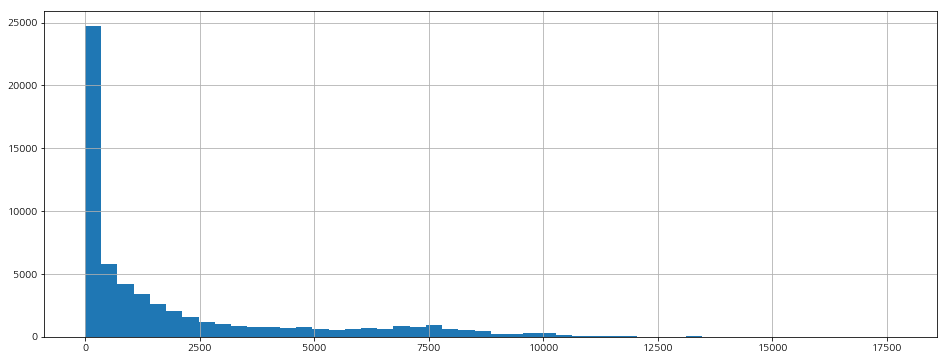

In [400]:
df['fr_wthr_fclt_dstnc'].hist(figsize=[16, 6], bins=50)

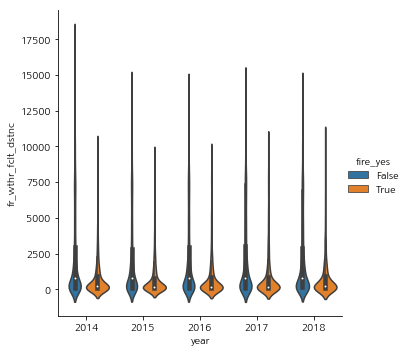

In [401]:
sns.catplot(hue='fire_yes', y='fr_wthr_fclt_dstnc', x='year', data=df, kind='violin')
plt.show()

## ahsm_dstnc 자동심장충격기와의 거리 
상관없을것 같은데, 외진 곳일수록 자동심장충격기도 적어서 결국 외진 곳에서 화재발생 많이 난다는 뜻?

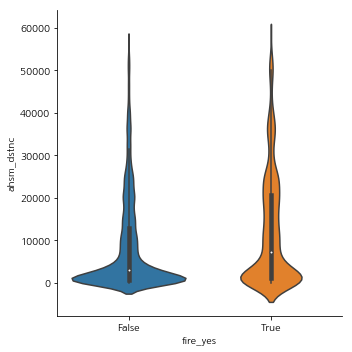

In [402]:
sns.catplot(
    x='fire_yes'
            , y='ahsm_dstnc'
            , data=df
            , kind='violin')
plt.show()

## fr_wthr_fclt_in_100m 반경 100m 내 소방용수시설 수
- 100m 내 소방용수시설이 많을수록 화재발생
- 불이 많이 나는 곳일수록 소방용수시설 많이 설치?
- 대부분 없다

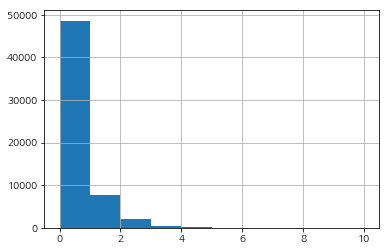

In [403]:
#100m 내 소방용수시설수 전체

df['fr_wthr_fclt_in_100m'].hist()

In [404]:
# 100m 내 소방용수시설수 화재발생건 only

data = pd.DataFrame(df.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum())
data
# data['fire_yes'].hist(bins=50)

,fire_yes
fr_wthr_fclt_in_100m,
0,5540.0
1,1448.0
2,485.0
3,124.0
4,45.0
5,11.0
6,2.0
7,2.0
8,0.0


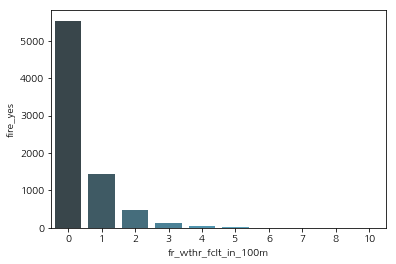

In [405]:
data = pd.DataFrame(df.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum()).reset_index()

sns.barplot(x='fr_wthr_fclt_in_100m', y='fire_yes', data=data, palette='GnBu_d')

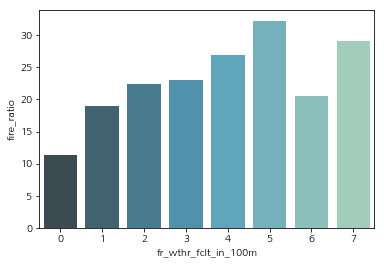

In [406]:
# 소방용수 시설 거리에 따른 화재발생 비율

data_True = pd.DataFrame(df[df['fire_yes'] == True].groupby(['fr_wthr_fclt_in_100m', 'fire_yes'])['id'].sum()).reset_index()
data_False = pd.DataFrame(df[df['fire_yes'] == False].groupby(['fr_wthr_fclt_in_100m', 'fire_yes'])['id'].sum()).reset_index()

data = data_True.merge(data_False, how='inner', on='fr_wthr_fclt_in_100m')
data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

# data
sns.barplot(x='fr_wthr_fclt_in_100m', y='fire_ratio', data=data, palette='GnBu_d')

## bldng_ar 건물 건축면적

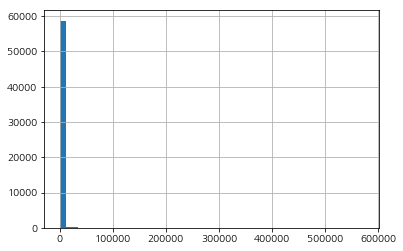

In [407]:
df['bldng_ar'].hist(bins=50)

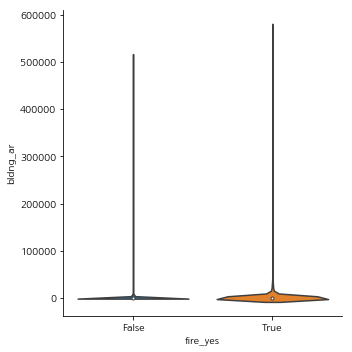

In [408]:
sns.catplot(
    x='fire_yes'
            , y='bldng_ar'
#             , x='year'
            , data=df
            , kind='violin')
plt.show()

## jmk 용도

In [409]:
df['jmk'].unique()

array(['대', '주', '잡', '종', '차', '답', '장', '양', '전', '창', '학', '목', '도',
       '임', '철', '유', '천', '구', '체', '과', '묘', '공', '원', '사', '제', '수'],
      dtype=object)

In [410]:
plt.rcParams['font.family'] = 'NanumGothic'

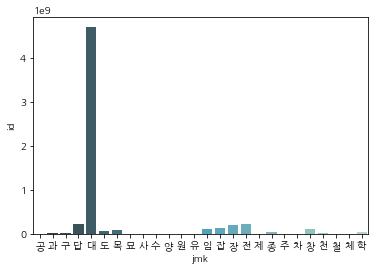

In [411]:
data = pd.DataFrame(df.groupby('jmk')['id'].sum()).reset_index()

sns.barplot(x='jmk', y='id', data=data, palette='GnBu_d')

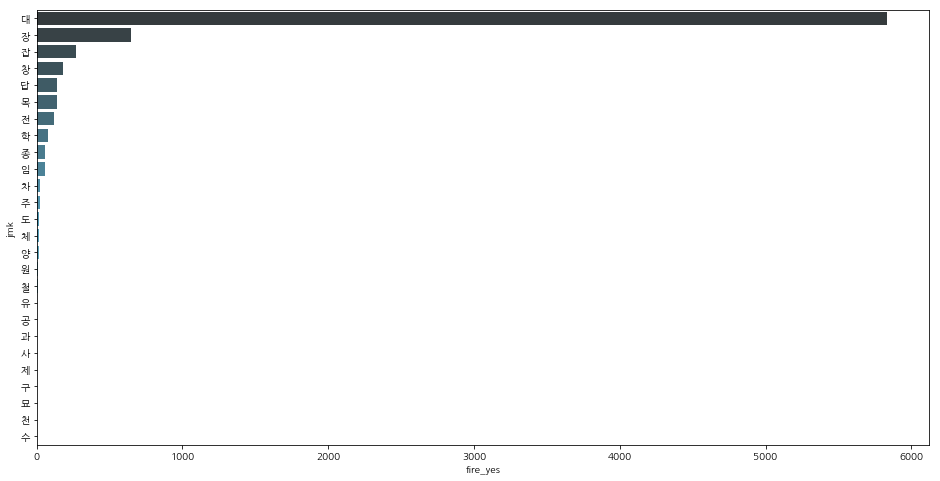

In [412]:
data = pd.DataFrame(df.groupby('jmk')['fire_yes'].sum()).reset_index()
data = data.sort_values(['fire_yes'], ascending=False)

plt.figure(figsize=[16, 8])
sns.barplot(y='jmk', x='fire_yes', data=data, palette='GnBu_d')

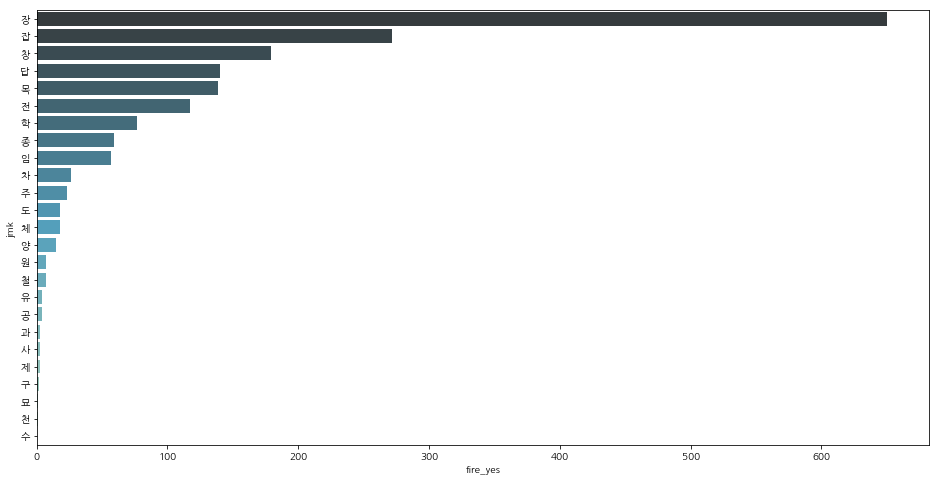

In [413]:
data = pd.DataFrame(df[df['jmk'] != '대'].groupby('jmk')['fire_yes'].sum()).reset_index()

data = data.sort_values(['fire_yes'], ascending=False)
plt.figure(figsize=[16, 8])
sns.barplot(y='jmk', x='fire_yes', data=data, palette='GnBu_d')

### jmk log scale 적용

In [414]:
data['fire_yes(log)'] = np.log(data['fire_yes'])
# 화재발생 0 인 곳이 있어서, log 값을 그래프에 나타내기 위해 0.1로 고쳐줌
data.loc[data['fire_yes'] == 0, 'fire_yes(log)'] = 0.1
data[['fire_yes', 'fire_yes(log)']].sample()

,fire_yes,fire_yes(log)
17,59.0,4.077537


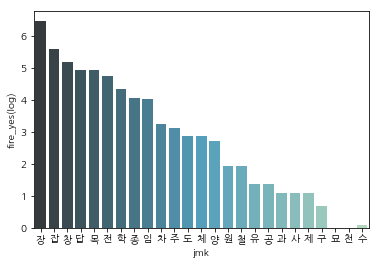

In [415]:
sns.barplot(x='jmk', y='fire_yes(log)', data=data, palette='GnBu_d')

### 각 지목jmk별 화재발생 비율 계산 

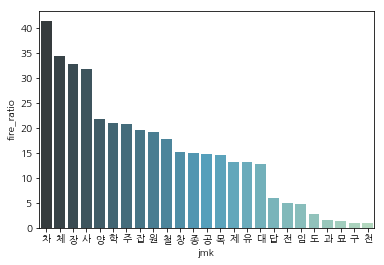

In [416]:
data_True = pd.DataFrame(df[df['fire_yes'] == True].groupby(['jmk', 'fire_yes'])['id'].sum()).reset_index()
data_False = pd.DataFrame(df[df['fire_yes'] == False].groupby(['jmk', 'fire_yes'])['id'].sum()).reset_index()

data = data_True.merge(data_False, how='left', on='jmk')
data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

data = data.sort_values('fire_ratio', ascending=False)
data[['jmk', 'fire_ratio']]

sns.barplot(x='jmk', y='fire_ratio', data=data, palette='GnBu_d')

## fr_sttn_dstnc

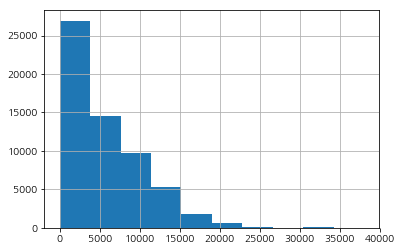

In [417]:
df['fr_sttn_dstnc'].hist()

In [418]:
# data = pd.DataFrame(df.groupby('fr_sttn_dstnc')['fire_yes'].sum()).reset_index()

# sns.barplot(x='fr_sttn_dstnc', y='fire_yes', data=data, palette='GnBu_d')

In [419]:
# fr_sttn_dstnc 비율
data_True = pd.DataFrame(df[df['fire_yes'] == True].groupby(['fr_sttn_dstnc', 'fire_yes'])['id'].size()).reset_index()
data_False = pd.DataFrame(df[df['fire_yes'] == False].groupby(['fr_sttn_dstnc', 'fire_yes'])['id'].size()).reset_index()

data = data_True.merge(data_False, how='inner', on='fr_sttn_dstnc')
data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

data

,fr_sttn_dstnc,fire_yes_x,id_x,fire_yes_y,id_y,fire_ratio
0,42,True,1,False,1,50.000000
1,50,True,1,False,2,33.333333
2,57,True,1,False,1,50.000000
3,58,True,1,False,2,33.333333
4,61,True,2,False,1,66.666667
5,75,True,1,False,1,50.000000
6,77,True,2,False,2,50.000000
7,79,True,1,False,4,20.000000
8,80,True,1,False,3,25.000000
9,83,True,1,False,4,20.000000


In [420]:
# # relplot 은 이렇게 쓰는거 아닌듯
# sns.relplot(x='fr_sttn_dstnc', y='fire_ratio', data=data)
# plt.show()

### fr_sttn_dstnc 119안전센터와의 거리 log scale

In [421]:
df['fr_sttn_dstnc(log)'] = np.log(df['fr_sttn_dstnc'])

df[['fr_sttn_dstnc', 'fr_sttn_dstnc(log)']].sample()

,fr_sttn_dstnc,fr_sttn_dstnc(log)
1316,7425,8.912608


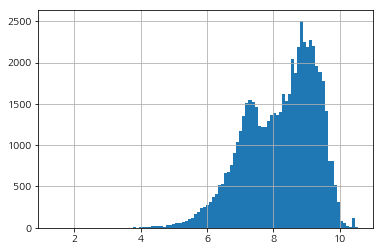

In [422]:
df['fr_sttn_dstnc(log)'].hist(bins=100)

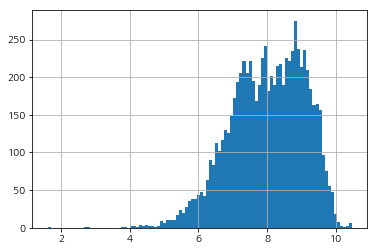

In [423]:
df[df['fire_yes'] == True]['fr_sttn_dstnc(log)'].hist(bins=100)

## tbc_rtl_str_dstnc 담배소매점과의 거리

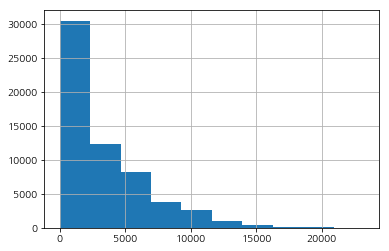

In [424]:
df['tbc_rtl_str_dstnc'].hist()

In [425]:
# 비율 계산

# data_True = pd.DataFrame(df[df['fire_yes'] == True].groupby(['tbc_rtl_str_dstnc', 'fire_yes'])['id'].sum()).reset_index()
# data_False = pd.DataFrame(df[df['fire_yes'] == False].groupby(['tbc_rtl_str_dstnc', 'fire_yes'])['id'].sum()).reset_index()

# data = data_True.merge(data_False, how='inner', on='tbc_rtl_str_dstnc')
# data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

# # data
# sns.barplot(x='tbc_rtl_str_dstnc', y='fire_ratio', data=data, palette='GnBu_d')

### tbc_rtl_str_dstnc 담배소매점과의 거리 log scale

In [426]:
df['tbc_rtl_str_dstnc(log)'] = np.log(df['tbc_rtl_str_dstnc'])
# 담배 소매점과의 거리가 0 인 곳이 80여곳 있어서, log 값을 그래프에 나타내기 위해 0.1로 고쳐줌
df.loc[df['tbc_rtl_str_dstnc'] == 0, 'tbc_rtl_str_dstnc(log)'] = 0.1
df[['tbc_rtl_str_dstnc', 'tbc_rtl_str_dstnc(log)']].sample()

,tbc_rtl_str_dstnc,tbc_rtl_str_dstnc(log)
55594,3489,8.15737


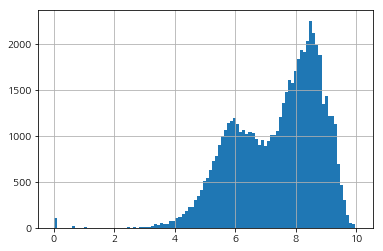

In [427]:
df['tbc_rtl_str_dstnc(log)'].hist(bins=100)

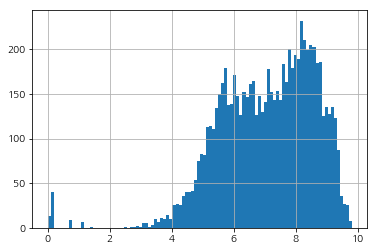

In [428]:
df[df['fire_yes'] == True]['tbc_rtl_str_dstnc(log)'].hist(bins=100)

## bldng_cnt 건물 채수

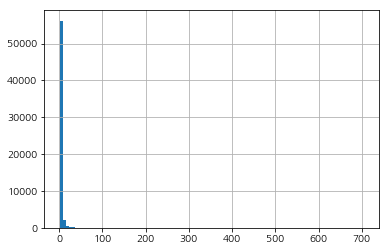

In [429]:
df['bldng_cnt'].hist(bins=100)

In [430]:
df['bldng_cnt(log)'] = np.log(df['bldng_cnt'])

df[['bldng_cnt', 'bldng_cnt(log)']].sample()

,bldng_cnt,bldng_cnt(log)
44967,1,0.0


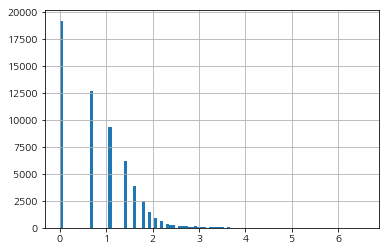

In [431]:
df['bldng_cnt(log)'].hist(bins=100)

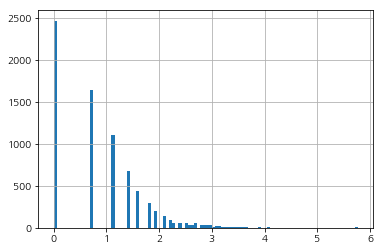

In [432]:
df[df['fire_yes'] == True]['bldng_cnt(log)'].hist(bins=100)

## ttl_ar 건물연면적

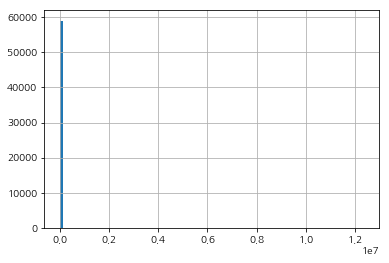

In [433]:
df['ttl_ar'].hist(bins=100)

In [434]:
df['ttl_ar(log)'] = np.log(df['ttl_ar'])
df.loc[df['ttl_ar'] == 0, 'ttl_ar(log)'] = 1 
df[['ttl_ar', 'ttl_ar(log)']].sample()

,ttl_ar,ttl_ar(log)
56586,97.52,4.580057


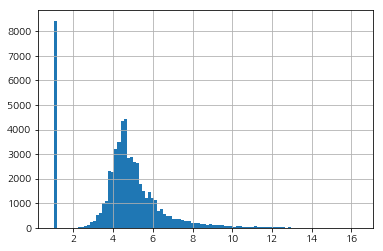

In [435]:
df['ttl_ar(log)'].hist(bins=100)

# Null 값 있는 컬럼

## emd_nm 주소                     4

In [436]:
train[(train['emd_nm'].isnull()) | (train['emd_nm'] == 'nan')]['emd_nm']

9165     NaN
15380    NaN
32671    NaN
36516    NaN
Name: emd_nm, dtype: object

In [437]:
address = train.drop([9165, 15380, 32671, 36516], axis=0)
# df = df.drop([9165, 15380, 32671, 36516], axis=0)

address.sample()

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
46330,111963,2018-05-27 14:41:41,종교시설,일반목구조,1,32.1,32.1,0.0,1.92501e+07,1.0,...,N,9593,0,0,6136,86908,3509,605,0,N


In [438]:
address['시도'] = np.nan
address['시군구'] = np.nan
address['구시동면읍'] = np.nan

address['시도'] = address['emd_nm'].apply(lambda x: str(x).split()[0])
address['시군구'] = address['emd_nm'].apply(lambda x: str(x).split()[1][:3])
address['구시동면읍'] = address['emd_nm'].apply(lambda x: str(x).split()[2])
# 창원시는 따로
address.loc[address['시군구'].apply(lambda x: len(x) > 3), '구시동면읍'] = address['emd_nm'].apply(lambda x: str(x).split()[1][3:])

address[['emd_nm', '시도', '시군구', '구시동면읍']].sample()

,emd_nm,시도,시군구,구시동면읍
18961,경상남도 사천시 용현면,경상남도,사천시,용현면


In [439]:
df['시도'] = address['시도']
df['시군구'] = address['시군구']
df['구시동면읍'] = address['구시동면읍']
df['주소'] = address['시도'] + ' ' + address['시군구'] + ' ' + address['구시동면읍']

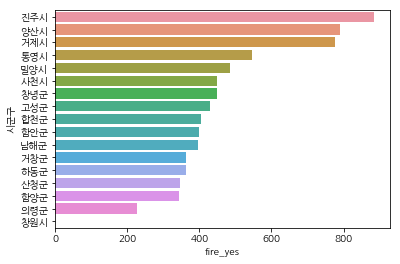

In [440]:
data = pd.DataFrame(df.groupby('시군구')['fire_yes'].sum().reset_index())
data = data.sort_values('fire_yes', ascending=False)

sns.barplot(y='시군구', x='fire_yes',data=data)

## 행정구역 emd_nm 전체

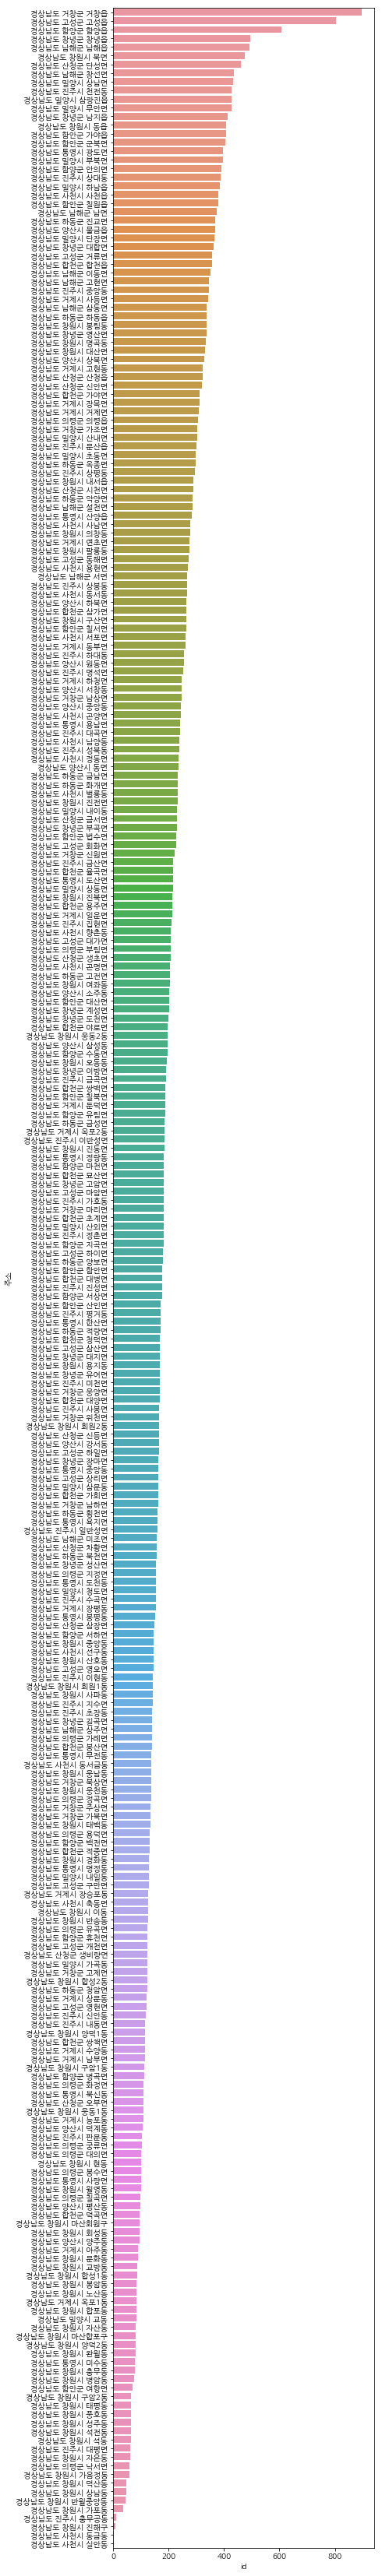

In [441]:
countby_address = pd.DataFrame(df.groupby('주소')['id'].count().reset_index())
countby_address = countby_address.sort_values('id', ascending=False)

plt.figure(figsize=[6, 60])
sns.barplot(y='주소', x='id',data=countby_address)

## 행정구역별 화재발생 수

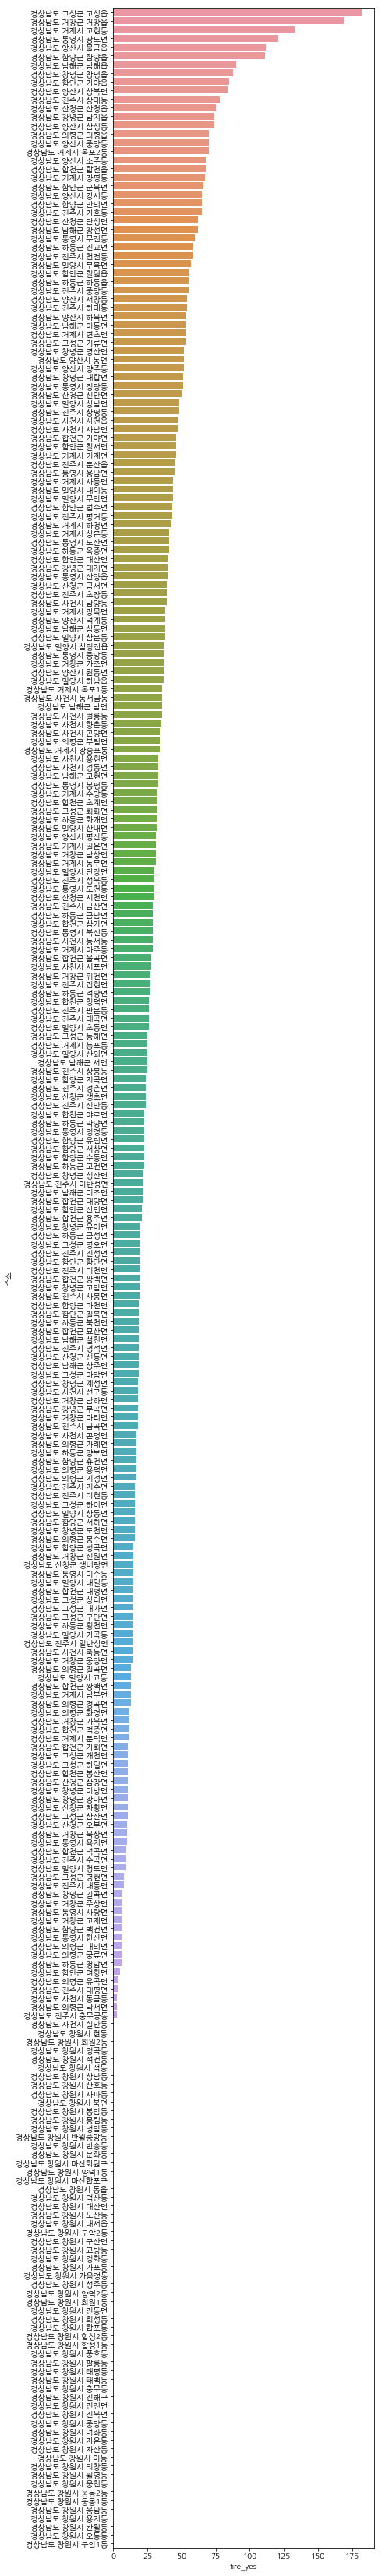

In [442]:
fire_countby_address = pd.DataFrame(df.groupby('주소')['fire_yes'].sum().reset_index())
fire_countby_address = fire_countby_address.sort_values('fire_yes', ascending=False)

plt.figure(figsize=[6, 60])
sns.barplot(y='주소', x='fire_yes',data=fire_countby_address)

## 행정구역별 화재발생 비율

In [443]:
fire_address = fire_countby_address.merge(countby_address, how='left', on='주소')

fire_address.sample()

,주소,fire_yes,id
80,경상남도 남해군 남면,36.0,374


In [444]:
fire_address['ratio'] = fire_address['fire_yes'] * 100 / fire_address['id']
fire_address = fire_address.sort_values('ratio', ascending=False)
fire_address.sample()

,주소,fire_yes,id,ratio
276,경상남도 창원시 진전면,0.0,233,0.0


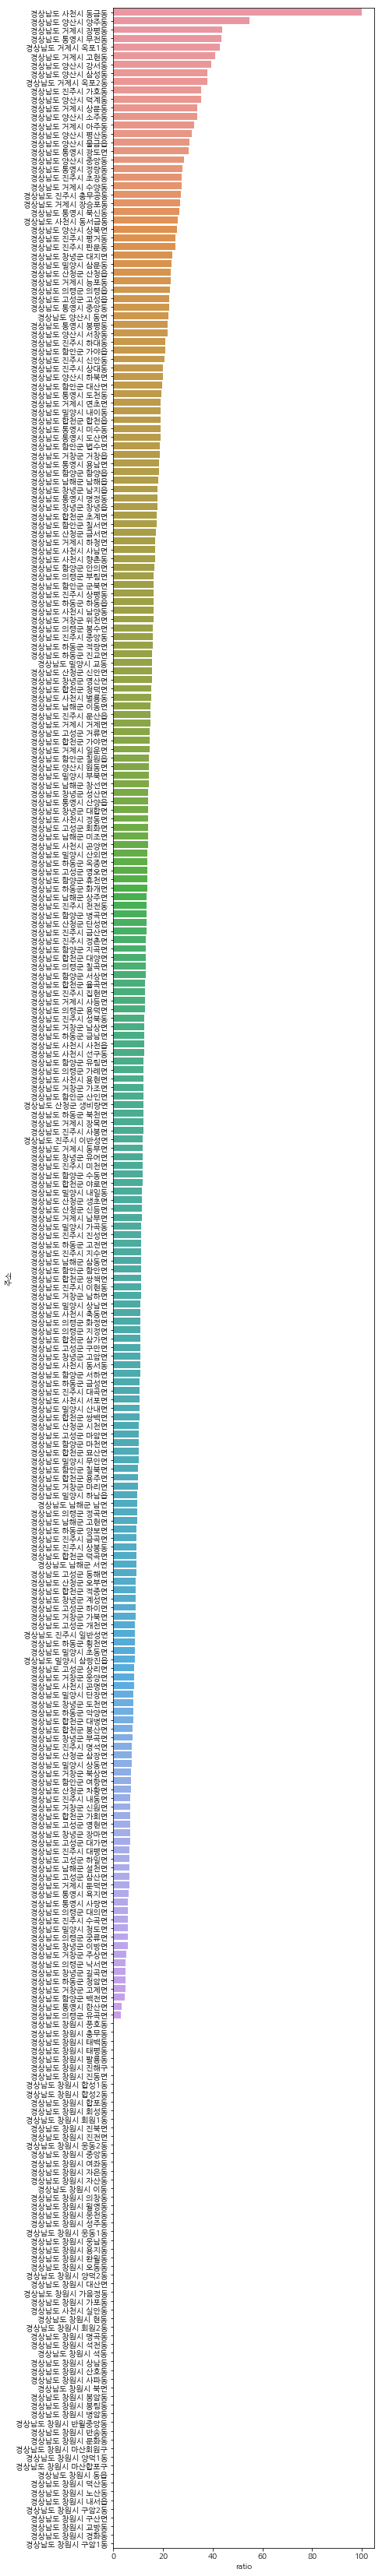

In [445]:
plt.figure(figsize=[6, 60])

sns.barplot(y='주소', x='ratio',data=fire_address)

화재발생비율이 100 % 인 사천시 동금동 데이터만 따로 보았다
- 전체 데이터 3 건 중 화재발생 3 건...

In [446]:
df[df['주소'] == '경상남도 사천시 동금동']

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,...,dayofweek,year-month,fr_sttn_dstnc(log),tbc_rtl_str_dstnc(log),bldng_cnt(log),ttl_ar(log),시도,시군구,구시동면읍,주소
20446,113578,2017-06-26 20:12:00,1,225.21,203.73,675.0,잡,934,245,N,...,Monday,2017-06,6.839476,5.880533,0.0,5.316796,경상남도,사천시,동금동,경상남도 사천시 동금동
20673,118226,2014-08-08 14:26:00,1,225.21,203.73,675.0,잡,934,245,N,...,Friday,2014-08,6.839476,5.880533,0.0,5.316796,경상남도,사천시,동금동,경상남도 사천시 동금동
20680,104635,2014-05-22 21:38:00,1,225.21,203.73,675.0,잡,934,245,N,...,Thursday,2014-05,6.839476,5.880533,0.0,5.316796,경상남도,사천시,동금동,경상남도 사천시 동금동


## hm_cnt 행정구역 인구            701

In [447]:
df = df.merge(train[['id', 'hm_cnt']], on='id')

df.sample()

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,...,year-month,fr_sttn_dstnc(log),tbc_rtl_str_dstnc(log),bldng_cnt(log),ttl_ar(log),시도,시군구,구시동면읍,주소,hm_cnt
56388,76025,2014-03-20 01:15:53,5,59.49,59.49,0.0,대,2453,1182,N,...,2014-03,7.805067,8.285513,1.609438,4.085808,경상남도,함양군,지곡면,경상남도 함양군 지곡면,2149.0


### '경상남도' 제외한 주소 ['address'] 칼럼 만들기

In [448]:
df['address'] = df['시군구'] + ' ' + df['구시동면읍']

df[['시군구', '구시동면읍', 'address']].sample()

,시군구,구시동면읍,address
18707,사천시,정동면,사천시 정동면


인구 Null 값인 행정구역을 찾아보니, 몇 개 행정구역에 몰려있음

In [449]:
df[df['hm_cnt'].isnull()]['address'].value_counts()

진주시 상대동      245
진주시 하대동      167
창원시 마산회원구     96
창원시 마산합포구     80
함안군 칠원읍       59
창원시 진해구        9
통영시 산양읍        6
통영시 욕지면        6
사천시 동금동        3
창녕군 대합면        2
거제시 거제면        2
하동군 금남면        2
고성군 거류면        2
통영시 용남면        2
하동군 진교면        2
거제시 둔덕면        1
거제시 아주동        1
남해군 이동면        1
거제시 장목면        1
고성군 회화면        1
사천시 실안동        1
남해군 창선면        1
통영시 미수동        1
창녕군 이방면        1
통영시 도산면        1
남해군 남해읍        1
남해군 고현면        1
진주시 상평동        1
양산시 하북면        1
Name: address, dtype: int64

### 행정구역별로 뜯어보기

#### 진주시 인구 Null 값
> 진주시청 제공, 12월말 기준

진주시 동 | 2014 | 2015 | 2016
-|-|-|-
진주시 상대동| 26_019 | 25_599 | 25_321
진주시 하대동| 27_457 | 26_981 | 27_067


In [450]:
df[df['address'] == '진주시 상대동'].groupby('year')['hm_cnt'].median()

year
2014        NaN
2015        NaN
2016        NaN
2017    22764.0
2018    22296.0
Name: hm_cnt, dtype: float64

In [451]:
df[df['address'] == '진주시 하대동'].groupby('year')['hm_cnt'].median()

year
2014        NaN
2015        NaN
2016        NaN
2017    28687.5
2018    28164.0
Name: hm_cnt, dtype: float64

#### 창원시는 null 값 뿐임. 인구 정보 따로 찾아보기
> 창원시청 제공, 12월말 기준

창원시 구 | 2014 | 2015 | 2016 | 2017 | 2018
-|-|-|-|-|-
창원시 마산합포구 | 184_179 | 183_829 | 183_989 | 181_917 | 182_772
창원시 마산회원구 | 216_749 | 214_264 | 213_163 | 203_926 | 201_565
창원시 진해구 | - | 189_463 | 190_780 | - |196_665

In [452]:
df[df['address'] == '창원시 마산회원구'].groupby('year')['hm_cnt'].median()

year
2014   NaN
2015   NaN
2016   NaN
Name: hm_cnt, dtype: float64

In [453]:
df[df['address'] == '창원시 마산합포구'].groupby('year')['hm_cnt'].median()

year
2014   NaN
2015   NaN
2016   NaN
2017   NaN
Name: hm_cnt, dtype: float64

In [454]:
df[df['address'] == '창원시 진해구'].groupby('year')['hm_cnt'].median()

year
2015   NaN
2016   NaN
2018   NaN
Name: hm_cnt, dtype: float64

#### 함안군 칠원읍
인구 감소하는 추세 반영해서 선형모델로 예측

In [455]:
df[df['address'] == '함안군 칠원읍'].groupby('year')['hm_cnt'].median()

year
2014        NaN
2015    21131.0
2016    21022.0
2017    20889.5
2018    20672.0
Name: hm_cnt, dtype: float64

#### 사천시 동금동, 사천시 실안동 동단위 자료 없음
사천시 전체에서 적은 비중이라 삭제

In [456]:
df[df['address'] == '사천시 동금동'].groupby('year')['hm_cnt'].median()

year
2014   NaN
2017   NaN
Name: hm_cnt, dtype: float64

In [457]:
df[df['address'] == '사천시 실안동'].groupby('year')['hm_cnt'].median()

year
2017   NaN
Name: hm_cnt, dtype: float64

In [458]:
df[df['시군구'] == '사천시']['address'].value_counts()

사천시 사천읍     380
사천시 사남면     278
사천시 용현면     270
사천시 동서동     266
사천시 서포면     262
사천시 곤양면     243
사천시 남양동     239
사천시 정동면     235
사천시 벌룡동     234
사천시 향촌동     209
사천시 곤명면     205
사천시 선구동     146
사천시 동서금동    138
사천시 축동면     127
사천시 동금동       3
사천시 실안동       1
Name: address, dtype: int64

In [508]:
df[df['address'] == '사천시 동금동'] # id 113578, 118226, 104635
# df[df['address'] == '사천시 실안동'] # id 92201

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,...,시도,시군구,구시동면읍,주소,hm_cnt,address,mlt_us_yn(encode),fr_mn_cnt,fr_mn_cnt(clean),hm_cnt(clean)
20444,113578,2017-06-26 20:12:00,1,225.21,203.73,675.0,잡,934,245,N,...,경상남도,사천시,동금동,경상남도 사천시 동금동,NaN,사천시 동금동,False,164.0,164.0,3.0
20671,118226,2014-08-08 14:26:00,1,225.21,203.73,675.0,잡,934,245,N,...,경상남도,사천시,동금동,경상남도 사천시 동금동,NaN,사천시 동금동,False,164.0,164.0,3.0
20678,104635,2014-05-22 21:38:00,1,225.21,203.73,675.0,잡,934,245,N,...,경상남도,사천시,동금동,경상남도 사천시 동금동,NaN,사천시 동금동,False,164.0,164.0,3.0


In [514]:
# 사천시 실안동, 동금동 로 삭제

df = df.drop([20444, 20671, 20678, 20674])

In [524]:
# 행정구역별 null 값 갯수

hm_cnt_null = df[df['hm_cnt'].isnull()]['address'].value_counts().reset_index()

hm_cnt_null

,index,address
0,진주시 상대동,245
1,진주시 하대동,167
2,창원시 마산회원구,96
3,창원시 마산합포구,80
4,함안군 칠원읍,59
5,창원시 진해구,9
6,통영시 산양읍,6
7,통영시 욕지면,6
8,창녕군 대합면,2
9,거제시 거제면,2


In [525]:
# hm_cnt = df.groupby(['address', 'year'])['hm_cnt'].median()

hm_cnt = df.groupby('address')['hm_cnt'].median()
np.median(hm_cnt['거제시 거제면'])

hm_cnt['진주시 상대동']

22654.0

In [526]:
# 행정구역별 인구 중간값 컬럼 추가

hm_cnt_null['hm_cnt'] = [np.median(hm_cnt[x]) for x in hm_cnt_null['index']]

hm_cnt_null

,index,address,hm_cnt
0,진주시 상대동,245,22654.0
1,진주시 하대동,167,28482.0
2,창원시 마산회원구,96,NaN
3,창원시 마산합포구,80,NaN
4,함안군 칠원읍,59,20971.0
5,창원시 진해구,9,NaN
6,통영시 산양읍,6,5194.0
7,통영시 욕지면,6,2078.0
8,창녕군 대합면,2,4083.0
9,거제시 거제면,2,7262.0


In [527]:
hm_cnt_null.loc[hm_cnt_null['index'] == '창원시 마산회원구', 'hm_cnt'] =np.median([216_749, 214_264, 213_163, 203_926, 201_565])
hm_cnt_null.loc[hm_cnt_null['index'] == '창원시 마산합포구', 'hm_cnt'] =np.median([184_179, 183_829, 183_989, 181_917, 182_772])
hm_cnt_null.loc[hm_cnt_null['index'] == '창원시 진해구', 'hm_cnt'] =np.median([189_463, 190_780, 196_665])

hm_cnt_null

,index,address,hm_cnt
0,진주시 상대동,245,22654.0
1,진주시 하대동,167,28482.0
2,창원시 마산회원구,96,213163.0
3,창원시 마산합포구,80,183829.0
4,함안군 칠원읍,59,20971.0
5,창원시 진해구,9,190780.0
6,통영시 산양읍,6,5194.0
7,통영시 욕지면,6,2078.0
8,창녕군 대합면,2,4083.0
9,거제시 거제면,2,7262.0


In [528]:
df['hm_cnt(clean)'] = df['hm_cnt'].copy()

# 행정구역 인구 Null 값 채우기
for i, row in hm_cnt_null.iterrows():

    df.loc[df['address'] == row['index'], 'hm_cnt(clean)'] = row['hm_cnt']

df[df['hm_cnt'].isnull()][['hm_cnt', 'address', 'hm_cnt(clean)']]

,hm_cnt,address,hm_cnt(clean)
4342,NaN,함안군 칠원읍,20971.0
6901,NaN,양산시 하북면,9388.0
6964,NaN,함안군 칠원읍,20971.0
7095,NaN,함안군 칠원읍,20971.0
7101,NaN,함안군 칠원읍,20971.0
7103,NaN,함안군 칠원읍,20971.0
7104,NaN,함안군 칠원읍,20971.0
7107,NaN,함안군 칠원읍,20971.0
7110,NaN,함안군 칠원읍,20971.0
7114,NaN,함안군 칠원읍,20971.0


In [529]:
# Null 값 잘 채워졌는지 확인

df['hm_cnt(clean)'].isnull().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F495CEE470>]],
      dtype=object)

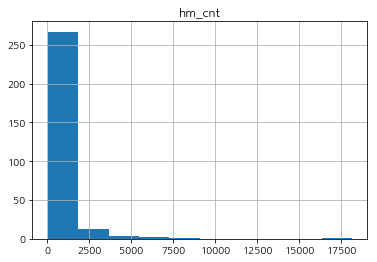

In [542]:
# hm_cnt 인구 Null 값을, 전체 중간값으로 채워도 문제없는지 확인

data = pd.DataFrame(df.groupby(['address'])['hm_cnt'].std())
# data[data['hm_cnt'] > 10_000]
data.hist()

In [546]:
df[df['address'] == '양산시 물금읍'][['year', 'hm_cnt']].sort_values('year')

,year,hm_cnt
4658,2014,59750.0
4435,2014,53752.0
4433,2014,53752.0
4423,2014,60524.0
4422,2014,60524.0
4421,2014,60524.0
4419,2014,60524.0
4416,2014,60524.0
25514,2014,62134.0
25584,2014,55563.0


### 행정구역 인구별 전체 데이터 수(log-scale)

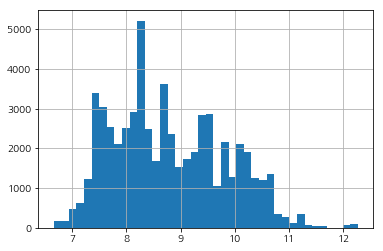

In [566]:
np.log(df['hm_cnt(clean)']).hist(bins=40)

### 행정구역 인구별 화재발생 수(log-scale)

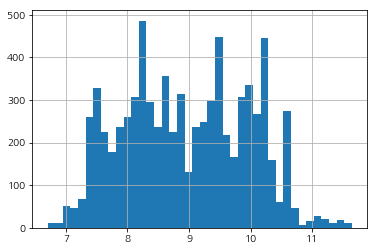

In [565]:
np.log(df[df['fire_yes'] == True]['hm_cnt(clean)']).hist(bins=40)

인구가 많은 곳이 상대적으로 화재발생률이 높다

## bldng_archtctr 건물구조
Null 값 많아서 일단 제외

In [459]:
train['bldng_archtctr'].value_counts()

벽돌구조           7377
일반목구조          6852
철근콘크리트구조       6694
블록구조           4087
경량철골구조         3378
일반철골구조         1938
조적구조            398
강파이프구조          395
기타조적구조          176
석구조              55
철골철근콘크리트구조       43
기타강구조            36
철골콘크리트구조         35
기타구조             27
목구조              17
프리케스트콘크리트구조      14
통나무구조            11
기타콘크리트구조          1
Name: bldng_archtctr, dtype: int64

## lnd_us_sttn_nm 토지 이용상황 명
Null 값 많아서 일단 제외

In [460]:
train['lnd_us_sttn_nm'].value_counts()

단독          34739
주거기타         3966
상업용          3191
주상용          2957
공업용          2000
전            1525
답            1291
주거나지         1159
답기타          1081
전기타           826
아파트           737
자연림           719
주상기타          471
도로등           358
과수원           276
상업기타          258
업무용           231
다세대           229
주상나지          189
공업기타          147
연립            144
상업나지          142
하천등           133
토지임야          125
공업나지          115
임야기타           75
조림             63
주차장등           48
공원등            43
기타             41
운동장등           37
유해.혐오시설        35
목장용지           21
고속도로휴게소        15
여객자동차터미널       12
골프장 회원제         8
위험시설            5
유원지             3
특수기타            2
공원묘지            2
콘도미니엄           1
스키장             1
골프장 대중제         1
발전소             1
Name: lnd_us_sttn_nm, dtype: int64

## rs_sd_nm 도로측면명

In [461]:
train['rd_sd_nm'].value_counts()

세로한면(가)    21117
세로한면(불)    15667
소로한면        8920
맹지          2300
소로각지        2213
중로한면        2170
세로각지(가)     2056
중로각지        1385
세로각지(불)      699
광대로한면        642
광대소각         424
광대세각          87
지정되지않음        28
Name: rd_sd_nm, dtype: int64

### mlt_us_yn 다중이용시설 포함여부

In [462]:
df['mlt_us_yn'].unique()

array(['N', 'Y'], dtype=object)

In [463]:
df['mlt_us_yn(encode)'] = df['mlt_us_yn'] == 'Y'

df[['mlt_us_yn', 'mlt_us_yn(encode)']].sample()

,mlt_us_yn,mlt_us_yn(encode)
53938,N,False


In [464]:
data_fire = pd.DataFrame(df.groupby('mlt_us_yn(encode)')['fire_yes'].sum()).reset_index()
data_all = pd.DataFrame(df.groupby('mlt_us_yn(encode)')['id'].count()).reset_index()
data = data_fire.merge(data_all, on='mlt_us_yn(encode)')
data['ratio'] = data['fire_yes'] * 100 / data['id']
data

,mlt_us_yn(encode),fire_yes,id,ratio
0,False,7548.0,59010,12.791052
1,True,109.0,189,57.671958


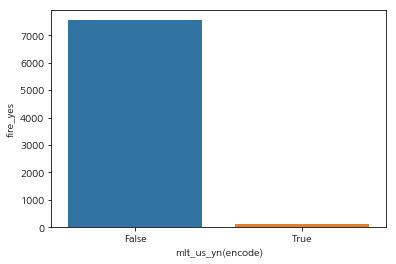

In [465]:
# 다중이용시설 포함여부별 화재발생 건수
sns.barplot(x='mlt_us_yn(encode)', y='fire_yes', data=data)

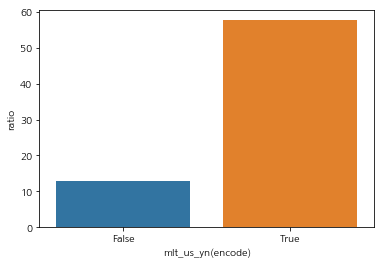

In [466]:
# 다중이용시설 포함여부별 화재발생 비율
sns.barplot(x='mlt_us_yn(encode)', y='ratio', data=data)

In [467]:
fr_mn_cnt = df_address.groupby('주소')['fr_mn_cnt'].median()
fr_mn_cnt.sample()

주소
경상남도 진주시 금곡면    194.0
Name: fr_mn_cnt, dtype: float64

## 행정구역명 Null 값 제외

In [468]:
df[df['주소'].isnull()]

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,...,tbc_rtl_str_dstnc(log),bldng_cnt(log),ttl_ar(log),시도,시군구,구시동면읍,주소,hm_cnt,address,mlt_us_yn(encode)
9165,104701,2014-12-08 03:52:34,1,190.0,190.00,2645.0,종,3521,1085,N,...,7.546446,0.000000,5.247024,NaN,NaN,NaN,NaN,NaN,NaN,False
15380,86852,2014-06-20 03:12:49,4,0.0,0.00,0.0,구,1920,686,N,...,6.996681,1.386294,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,False
32671,82755,2014-03-16 16:17:07,1,167.7,515.25,287.3,대,1443,103,N,...,6.905753,0.000000,6.244652,NaN,NaN,NaN,NaN,NaN,NaN,False
36516,85438,2016-05-05 16:55:00,7,150.9,150.90,0.0,도,872,64,N,...,6.378426,1.945910,5.016617,NaN,NaN,NaN,NaN,NaN,NaN,False


In [469]:
df = df.drop([9165, 15380, 32671, 36516])
df['주소'].isnull().sum()

0

## fr_mn_cnt 관할소방서 인원 Null 값 채우기

In [470]:
# df 에 fr_mn_cnt 값 채우기
df = df.merge(train[['id','fr_mn_cnt']], on='id')

df.sample()

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,...,bldng_cnt(log),ttl_ar(log),시도,시군구,구시동면읍,주소,hm_cnt,address,mlt_us_yn(encode),fr_mn_cnt
29440,71891,2014-11-06 16:51:46,1,177.22,529.92,354.8,대,306,5215,N,...,0.0,6.272726,경상남도,창원시,용지동,경상남도 창원시 용지동,31671.0,창원시 용지동,False,176.0


In [471]:
fr_mn_cnt_null = df[df['fr_mn_cnt'].isnull()]['주소'].value_counts().reset_index()

fr_mn_cnt_null

,index,주소
0,경상남도 통영시 광도면,12
1,경상남도 사천시 향촌동,4
2,경상남도 창원시 구산면,4
3,경상남도 고성군 삼산면,3
4,경상남도 통영시 도산면,2
5,경상남도 통영시 욕지면,2
6,경상남도 하동군 금남면,1
7,경상남도 거제시 아주동,1
8,경상남도 고성군 동해면,1
9,경상남도 고성군 거류면,1


In [472]:
# 행정구역명 | Null 값 갯수 | 소방서 인원수
fr_mn_cnt_null['fr_mn_cnt'] = [fr_mn_cnt[x] for x in fr_mn_cnt_null['index']]

fr_mn_cnt_null

,index,주소,fr_mn_cnt
0,경상남도 통영시 광도면,12,161.0
1,경상남도 사천시 향촌동,4,164.0
2,경상남도 창원시 구산면,4,176.0
3,경상남도 고성군 삼산면,3,112.0
4,경상남도 통영시 도산면,2,161.0
5,경상남도 통영시 욕지면,2,161.0
6,경상남도 하동군 금남면,1,118.0
7,경상남도 거제시 아주동,1,210.0
8,경상남도 고성군 동해면,1,112.0
9,경상남도 고성군 거류면,1,112.0


In [473]:
df[df['시군구'] == '남해군']['fr_mn_cnt'].unique()

array([106.,  nan])

남해군 전체에서 fr_mn_cnt 소방서 인원수가 같다

In [474]:
df['fr_mn_cnt(clean)'] = df['fr_mn_cnt'].copy()

# 소방서인원 Null 값 채우기
for i, row in fr_mn_cnt_null.iterrows():

    df.loc[df['주소'] == row['index'], 'fr_mn_cnt(clean)'] = row['fr_mn_cnt']

df[df['fr_mn_cnt'].isnull()][['fr_mn_cnt', 'fr_mn_cnt(clean)']]

,fr_mn_cnt,fr_mn_cnt(clean)
11136,NaN,161.0
11911,NaN,161.0
12801,NaN,161.0
14217,NaN,161.0
14439,NaN,161.0
14440,NaN,161.0
14778,NaN,161.0
15478,NaN,161.0
29861,NaN,176.0
29863,NaN,176.0


In [475]:
# 소방서 인원 Null 값 채워졌는지 확인

df['fr_mn_cnt(clean)'].isnull().sum()

0